# 1. Convolution of Two Gaussians
There are two methods to show that the convolution of two Gaussians is a Gaussian.

Let: $$g(t) = \sqrt{\frac{a}{\pi}}e^{-at^2}; h(t) = \sqrt{\frac{b}{\pi}}e^{-bt^{2}}; f(t) = \int_{-\infty}^\infty g(\tau)h(t-\tau)d\tau$$

## Part (a)
First, do the brute-force method and carry out the integral:
$$f(t) = \frac{\sqrt{ab}}{\pi}\int_{-\infty}^\infty e^{-a\tau^2}e^{-b(t-\tau)^2}d\tau = \sqrt{\frac{c}{\pi}}e^{-ct^2}; c = \frac{ab}{a+b}$$

**Hint:** Show that the (negative of the) exponent can be rewritten as:

$$a\tau^2 + b(t-\tau)^2 = (a+b)\left(\tau - \frac{bt}{a+b} \right)^2 + \frac{ab}{a+b}t^2; \text{ Also use:} \int_{-\infty}^\infty e^{-z\tau^2}d\tau = \sqrt{\frac{\pi}{z}}$$

## Part (b)
Use the convolution theorem (should be short) to arrive at the same result. 

**Hint:** $$\tilde{g}(\omega) = e^{-\frac{\omega ^2}{4a}}; \tilde{h}(\omega) = e^{-\frac{\omega ^2}{4b}}$$

## Part (c)
Show that if $a= 1/2\sigma_a^2$ and $b= 1/2 \sigma_b^2$ then it follows that: $$\sigma_c^2 = \sigma_a^2 + \sigma_b^2$$

# 2. Convolution of Exponentials
A microchannel plate amplifies a photon to $n_0$ electrons on average. It's response, however, is not Gaussian. The response for a single photon can be (very roughly) described as: $$P(n|1) = \frac{4n}{n_0^2}e^{-\frac{2n}{n_0}}$$

![](microchannel_plate_Q2.PNG){width=500}

---

***Special Note:***

The actual response is far more messy; it depends also on the photon energy!

---

To calculate the expected count rate from two photons, one must convolve:
$$P(n|2) = \int_0^n P(\nu|1)P(n-\nu|1) d\nu$$

## Part (a)
Show that the convolution results in: $$P(n|2) = \frac{2^4 n^3}{6n_0^4}e^{-\frac{2n}{n_0}}$$

## Part (b)
To calculate the expected count rate from three photons, one must convolve:
$$P(n|3) = \int_0^n P(\nu|2)P(n-\nu|1)d\nu ; \text{ show that } P(n|3) = \frac{2^6n^5}{120n_0^6} e^{-\frac{2n}{n_0}}$$

## Part(c)
Show by induction, that:
$$P(n|N) = \frac{2^{2N}n^{2N-1}}{(2N-1)!n_0^{2N}}e^{-\frac{2n}{n_0}}$$

# 3. Intensified CCDs
The vast majority of astronomical images are now from CCDs, which are ever evolving and changing. Intensified CCDs have been a popular choice for imaging far-away or faint objects particularly in the UV as they can count individual photons. No longer do readout noise, dark currents, biases, and pixel gain dominate the uncertainty. But there is a price to pay: the point spread is increased and another uncertainty is added.

Let's examine a simple (incorrect) version of a CCD with a Gaussian-response intensifier. Imagine that every photon striking the image intensifier creates $n_0 = 10^3$ electrons on average. However, the number of electrons striking the CCD varies. Let $n_e$ represent the number of electrons and $\sigma = 250$ represent the standard deviation; the probability of $n_e$ electrons from a single photon is $$P(n_e|N_{ph} = 1) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(n_e - n_0)^2}{2\sigma^2}}$$

## Part (a)
Let $N_{ph}$ represent the number of photons striking an individual pixel. Using the convolution of Gaussians, one can show that:

$$P(n_e|N_{ph}) = \frac{1}{\sqrt{2\pi N_{ph}}\sigma}e^{-\frac{(n_e - N_{ph}n_0)^2}{2N_{ph}\sigma^2}}$$


Suppose that one measures $n_e = 1.243 \times 10^3$. What is the probability that it is one photon? 2 photons? 

Use a Bayesian-like approach: Calculate all $P(n_e|N_{ph})$ for $N_{ph} = 0,1,2,...$ (reasonable cutoff) then normalize to 1 (something must have happened). Then deduce $P(N_{ph}|n_e)$ for each value of $N_{ph}$. For now, assume that $P(n_e|0) = 0$

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import scipy
import os,sys
import seaborn as sns
sns.set_style('whitegrid')

# import helper script file
## change working directory
os.chdir("/home/jasminekobayashi/gh_repos/Code-Reference-Notebook/CU-Boulder/AstroPhys/HW")

## import my own code
import hw_helper_func2 as hf  # this is my own code I made (for probability/distribution fucntions, etc.)

In [2]:
#TODO: Finish Q3(a)
# TODO: make the function compatible with passing a numpy array and check if element is equal to zero
    # currently produces an error about checking condition of array (np.any, np. all, etc.)
def P_electron_photon(ne = 1.243E3,Nph=1,sigma = 250,n0=10**3):
    '''Probability of Nph (number of photons) given ne (number of electrons)'''
    if Nph == 0:
        return 0
    else:
        exponent = -((ne - Nph*n0)**2)/(2*Nph*sigma**2)
        P = np.exp(exponent)/(np.sqrt(2*np.pi)*sigma)
        return P
P_electron_photon = np.vectorize(P_electron_photon)

In [3]:
cutoff=10
ph = np.arange(1,cutoff+1,1)
P_electron_photon(Nph=ph)
# print(sum(P_electron_photon(Nph=ph)))

array([9.94976488e-04, 1.61243413e-04, 4.24425173e-07, 3.98825375e-10,
       2.48215804e-13, 1.25721217e-16, 5.66061262e-20, 2.36791232e-23,
       9.43117952e-27, 3.62956984e-30])

In [4]:
sum(P_electron_photon(Nph=ph))

0.0011566447256835348

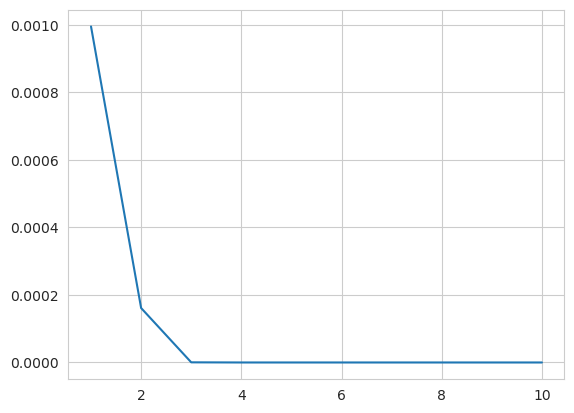

In [5]:
plt.plot(ph,P_electron_photon(Nph=ph))

In [6]:
PNph_Pne = 1/sum(P_electron_photon(Nph=ph))  # P(Nph)/P(ne) {to normalize}

In [7]:
def P_photon_electron(ne = 1.243E3,Nph=1,sigma = 250,n0=10**3):
    P_e_ph = P_electron_photon(ne=ne,Nph=Nph,sigma=sigma,n0=n0)
    return PNph_Pne*P_e_ph

In [8]:
P_photon_electron(Nph=ph)

array([8.60226538e-01, 1.39406172e-01, 3.66945151e-04, 3.44812341e-07,
       2.14599866e-10, 1.08694756e-13, 4.89399424e-17, 2.04722527e-20,
       8.15391219e-24, 3.13801616e-27])

In [9]:
sum(P_photon_electron(Nph=ph))

1.0

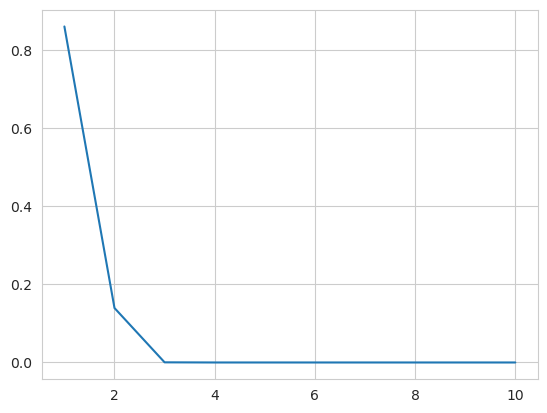

In [10]:
# TODO: produce plot of P(Nph|ne)??? (not asked tho)
    # TODO: maybe instead print probabilities with more descriptive statements
    # (e.g. "P(Nph = {}|ne) = {}") 
plt.plot(ph,P_photon_electron(Nph=ph))

## Part (b)

Now suppose one measures $n_e = 6.845 \times 10^3$ electrons. What is the most likely photon count? Calculate and plot the probability distribution of 1 to 12 photons. What is the most likely count? Argue that a Gaussian microchannel plate gains add only a small amount to the $\sqrt{N_{ph}}$ uncertainty.

In [26]:
ph_b[np.argmax(P_electron_photon(ne=6.845E3,Nph=ph_b))]

7

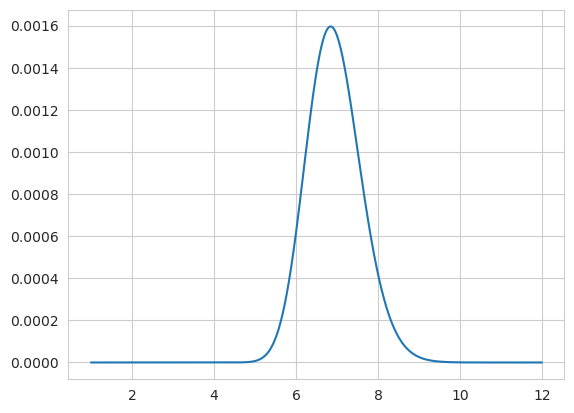

In [31]:
#TODO: Q3(b)
ph_b = np.arange(1,12,0.001)
plt.plot(ph_b,P_electron_photon(ne=6.845E3,Nph=ph_b))

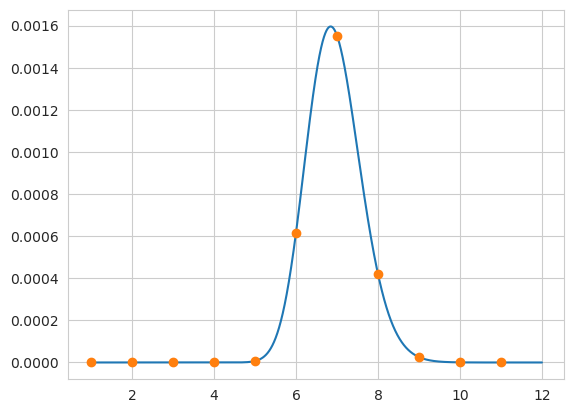

In [32]:
#TODO: choose this or other plot
ph_b = np.arange(1,12,0.001)
Q3_b = P_electron_photon(ne=6.845E3,Nph=ph_b)
plt.plot(ph_b,Q3_b)
plt.plot(np.arange(1,12,1),P_electron_photon(ne=6.845E3,Nph=np.arange(1,12,1)),'o')


## Part (c)

If only microchannel plates did have a Gaussian response! A bit closer to reality, 

$$P(n_e|N_{ph}) = \frac{2^{2N_{ph}}n_e^{2N_{ph} - 1}}{(2N_{ph} - 1)!n_0^{2N_{ph}}}e^{-\frac{2n_e}{n_0}}$$

Here, on average, one suspects $n_0 = 10^3$ electrons per photon strike. Suppose $n_e=1.243\times 10^3$. What is the probability of 1,2,3, or counts? As before, set $P(n_e|0) = 0$. Remember that all possibilities of $P$ must sum to one, so renormalize.

In [12]:
#TODO: Q3(c)
P_photon_electron(ne=1.243E3,Nph=ph)

array([8.60226538e-01, 1.39406172e-01, 3.66945151e-04, 3.44812341e-07,
       2.14599866e-10, 1.08694756e-13, 4.89399424e-17, 2.04722527e-20,
       8.15391219e-24, 3.13801616e-27])

In [13]:
sum(P_photon_electron(ne=1.243E3,Nph=ph))

1.0

## Part (d) 
Now suppose one measures $n_e = 6.845 \times 10^3$ electrons. What is the most likely photon count? Calculate and plot the probability distribution of 1 to 12 photons. What is the most likely count? Argue that the "real" microchannel plate gain significantly add to the $\sqrt{N_{ph}}$ uncertainty. 

In [14]:
#TODO: Q3(d)

# 4. Threshold and Dead Time
A microchannel plate has the advantage of being able to detect a single photon or particle but, in reality, has a highly complex response. To get around this issue, experimentally try to read out the microchannel plate (or the imaging CCD) rapidly; so rapidly that there is little chance of a $2^{nd}$ photon (or particle) from striking from read-out to read-out. Let's examine this method.

## Part (a) 
Suppose a stacked, two-microchannel plate response is ($n_0 = 10^6$) for UV photons: 

$$P(n|1) = \alpha \frac{4n}{n_0^2} e^{\frac{2n}{n_0}} + (1-\alpha)\delta(n)$$

The efficiency $\alpha = 0.75 \pm 0.03$ (25% of photons strike between the channels). In addition, a background noise level on a detector is equivalent to $10^4$ electrons, so we require at least $n_{thresh}=5\times 10^4$ electrons ($5\sigma$) to declare a detection. Show that the probability that a photon strikes a channel (ignore $\alpha$) and is **not** counted is $\sim 5 \times 10^{-3}$

In [15]:
# TODO: Q4 (a)
n_thresh = 5E4

def Q4_P():
    pass

## Part (b)
With the exception of the efficiency loss, a microchannel plate is the best way to actually "count" photons or particles. But what if the count rate is high? A detection takes time. Suppose that a detection takes $2\times 10^{-7}$ secs during which other photons cannot be counted. If once receives a count of $10^6$ in 1 s, how much 1s intervals is unavailable ($t_{dead}$)? (Hint: Very simple!)

In [16]:
# TODO: Q4 (b)

## Part (c)
Given a count rate of $10^4$ in 10 ms (called the integration time), what is the most likely number of photons that struck a channel? (Ignore $\alpha$ for now.)

In [17]:
# TODO: Q4 (c)

## Part (d)

Argue that the uncertainty in the efficiency leads to the largest uncertainty when count rates exceed $\sim 10^3$.

In [18]:
# TODO: Q4 (d)